# **Step 1: Setup Google Colab & Import Libraries**

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# **Step 2: Load the Netflix Dataset**

In [2]:

# Read the dataset
df = pd.read_csv("/content/netflix_titles.csv")

# Display first 5 rows
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# **Step 3: Data Cleaning & Preprocessing**

In [3]:
# Fix Chained Assignment Warning
df["rating"] = df["rating"].fillna(df["rating"].mode()[0])
df["duration"] = df["duration"].fillna("0 min")

# Drop rows where 'country' is NaN
df.dropna(subset=["country"], inplace=True)

# Convert 'date_added' to datetime format safely
df["date_added"] = pd.to_datetime(df["date_added"], errors='coerce', dayfirst=True)

# Drop any rows where 'date_added' is NaT (optional)
df.dropna(subset=["date_added"], inplace=True)


# **Step 4: Exploratory Data Analysis (EDA)**

In [15]:
!pip install squarify

1. Movie & TV Show Count

<ipython-input-62-88904d14c265>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




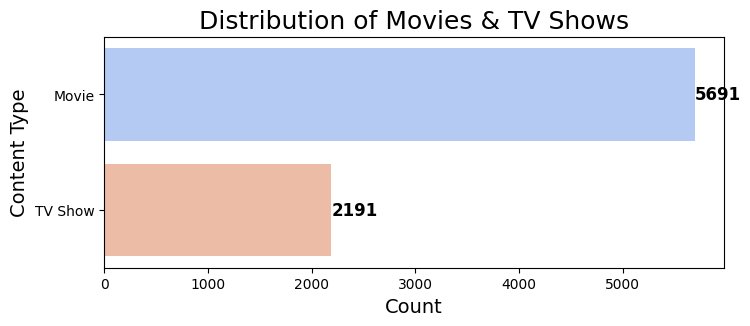

In [62]:
type_counts = df['type'].value_counts()

# Create a horizontal bar plot
plt.figure(figsize=(8, 3))
ax = sns.barplot(x=type_counts.values, y=type_counts.index, palette='coolwarm')

for i, v in enumerate(type_counts.values):
    ax.text(v + 1, i, str(v), color='black', va='center', fontsize=12, fontweight='bold')
plt.title("Distribution of Movies & TV Shows", fontsize=18)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Content Type", fontsize=14)

plt.show()


 2. Top 10 Most Common Genres

In [64]:
# Create Treemap plot
fig = px.treemap(genre_df.head(10),
                 path=['Genre'],
                 values='Count',
                 color='Count',
                 color_continuous_scale='Blues',
                 title="Top 10 Most Common Genres on Netflix")

fig.show()


3. Country-wise Distribution of Content

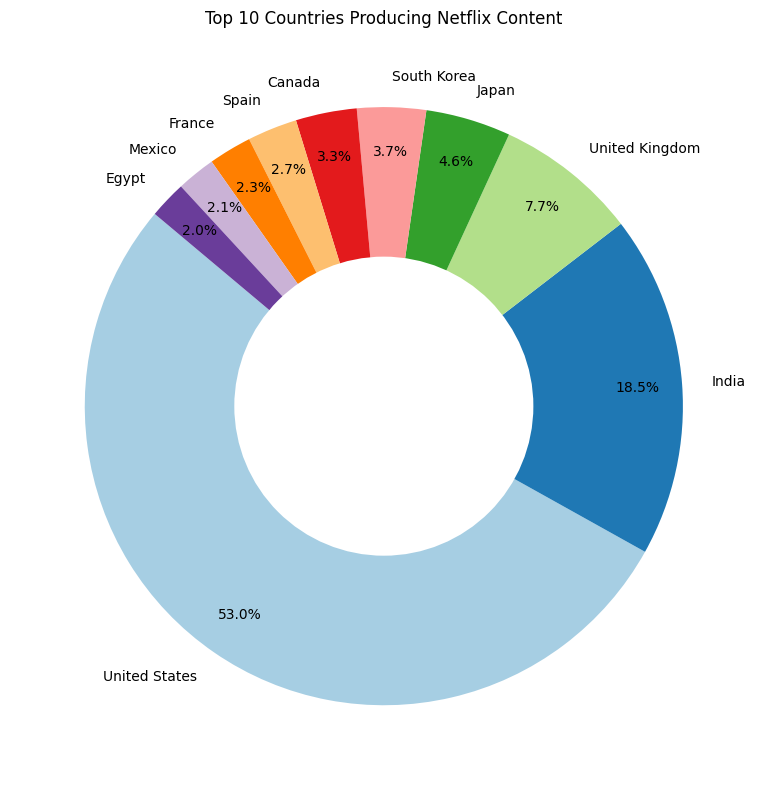

In [65]:
top_countries = df["country"].value_counts().head(10)

# Create donut chart
plt.figure(figsize=(8, 8))
colors = sns.color_palette("Paired", len(top_countries))
plt.pie(
    top_countries.values,
    labels=top_countries.index,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85
)

centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Top 10 Countries Producing Netflix Content")
plt.tight_layout()
plt.show()


4. Top 10 Most Frequent Actors on Netflix

<ipython-input-66-ed74f83373a3>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




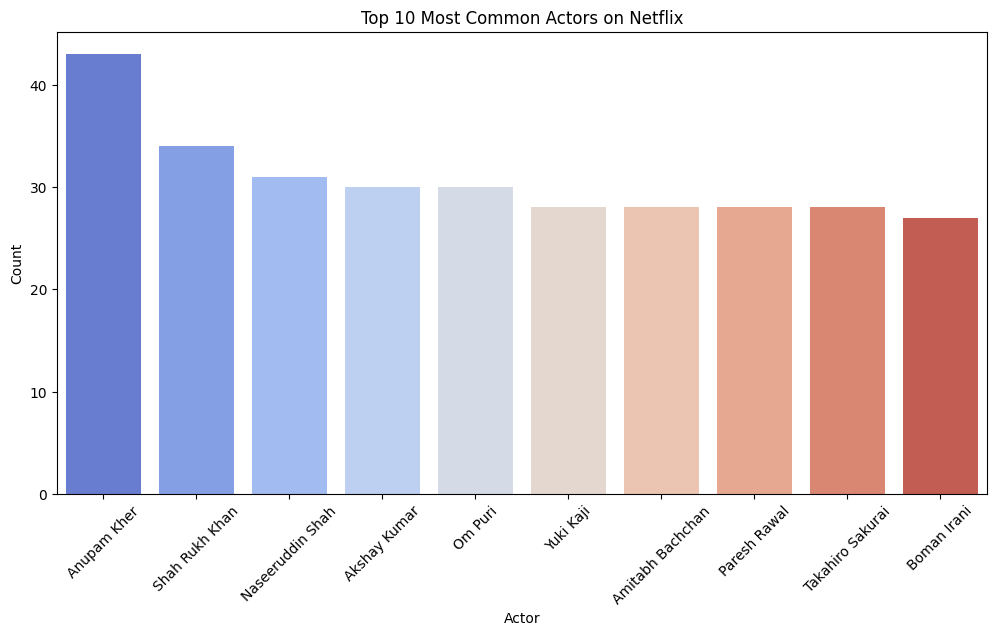

In [66]:
from collections import Counter

actors = df["cast"].dropna().str.split(", ")
actor_counts = Counter([actor.strip() for sublist in actors for actor in sublist])

actor_df = pd.DataFrame(actor_counts.items(), columns=["Actor", "Count"]).sort_values(by="Count", ascending=False)

# Create Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=actor_df.head(10), x="Actor", y="Count", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top 10 Most Common Actors on Netflix")
plt.show()


 5. Yearly Trend of Content Added on Netflix

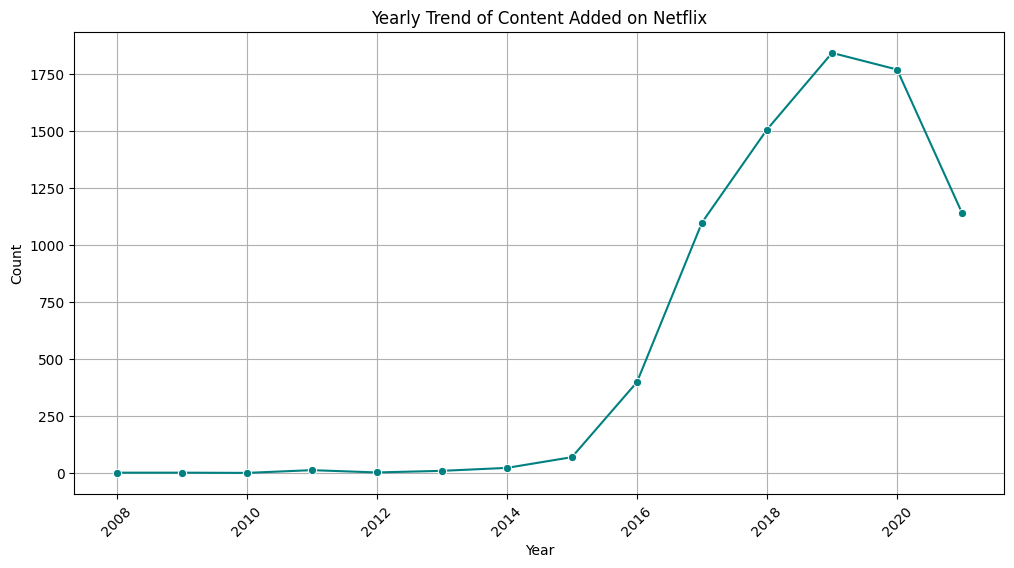

In [67]:
plt.figure(figsize=(12, 6))

yearly_trend = df["year_added"].value_counts().sort_index()

# Create Line plot
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, marker="o", color="teal")

plt.xticks(rotation=45)
plt.title("Yearly Trend of Content Added on Netflix")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.show()


6. Average Movie Duration on Netflix

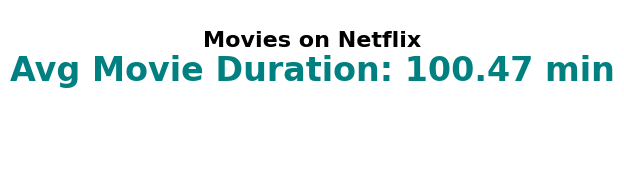

In [69]:
# Create a Scorecard

plt.figure(figsize=(2, 2))

plt.text(0.5, 0.6, f"Avg Movie Duration: {avg_duration:.2f} min",
         ha='center', va='center', fontsize=24, fontweight='bold', color='teal')

plt.text(0.5, 0.8, "Movies on Netflix", ha='center', va='center', fontsize=16, fontweight='bold', color='black')
plt.axis('off')
plt.show()


 Step 5: Compare Netflix with Amazon Prime & Disney+

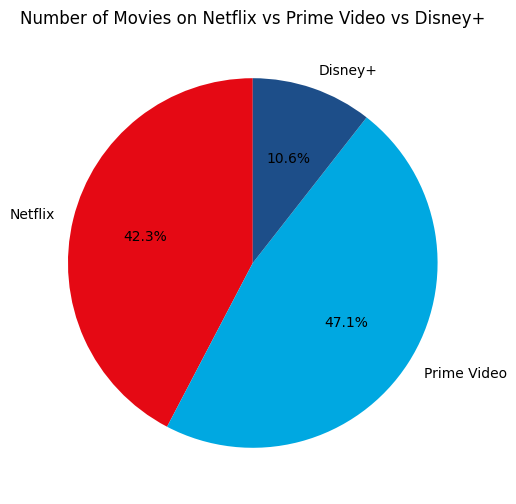

In [70]:
platform_colors = ["#E50914", "#00A8E1", "#1D4E89"]

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    platform_counts.values,
    labels=platform_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=platform_colors
)

plt.title("Number of Movies on Netflix vs Prime Video vs Disney+")
plt.show()
